#Assignment 01: Wikipedia text analysis of the French and German history of the 19th century

Name: Daniel Podolecki
\
Date: 02.12.2022

## Setup

In [ ]:
#!pip install eng_to_ipa
#!pip install wikipedia-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy.lang.en import English
from spacy import displacy
import eng_to_ipa as ipa
import scipy.sparse as sp
from wordcloud import WordCloud 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint

import wikipediaapi

import nltk
from nltk.corpus import stopwords as sw

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30


In [ ]:
wiki = wikipediaapi.Wikipedia('en')

## Introduction


The idea behind this topic is to find out if and how often common historical events, personalities and other countries in German and French history are mentioned in the extracted data. 

According to my expectation, this should concern the events around the **dates**:  *1813-15*, *1848* and *1870/1871*. 
- 1813 was the major defeat of the french troops by the alliance of Russia, Prussia, Austria and Sweden.  Between 1814 and 1815 the Congress of Vienna took place, where the reorganization of Europe was negotiated.
- 1848 was a revolutionary year in France, which resulted in a democracy trial in the German states. 
- 1870 was the war between France and the German states and the victory in 1871 of the German states led by Prussia with the creation of the German Empire.

Concerning the **personalities**, I expect that the name *Louis* and *Napoleon* appear in French history and the name could also appear in the german articles. 
For German  history, I expect the name of *Bismarck* and *Wilhelm* to appear, which also could play a role for the french articles.

Lastly, I also expect **other** **countries** to be mentioned in the Wikipedia articles. Worth mentioning for German history at that time were *Prussia, Austria, France, Denmark and Bavaria*. For France these should be *Prussia, Austria, Russia and Great Britain*.

If these assumptions are correct will be answered with the Explorative Text Analysis.

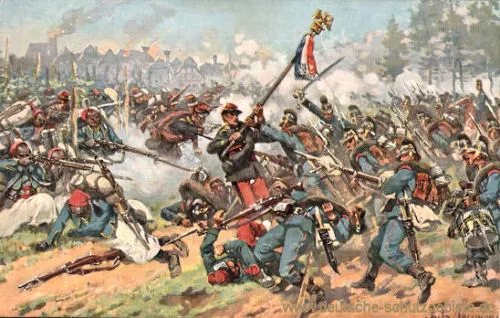

The picture is showing: The Capturing of the French flag by the 2nd Bavarian infantry regiment during the Franco-German War 1870. --> [Source](https://i0.wp.com/deutsche-schutzgebiete.de/wordpress/wp-content/uploads/2017/07/Woerth_6_August_1870_Eroberung_eines_franz_Adlers_durch_2_bayer_Infanterie-Regiement.jpg?w=500&ssl=1)


## Data Extraction

In [ ]:
# Get members for a category together with a short description
def members_collector(category):
      members_dict = {}
      categorymembers = category.categorymembers
      for category_member in categorymembers.values():
        if category_member.ns == 0:                                                            # show only catetegorie with ns = 0. This will exlude subcategories
          members_dict[category_member.title] = category_member.summary                         # map title to summary
      return members_dict
      #return categorymembers

### Extraction of French history 19th century

https://en.wikipedia.org/wiki/Category:19th_century_in_France 

In [ ]:
# Call function to retrieve French Category Name and Descripgtions
france_history = wiki.page("Category:19th_century_in_France")
france_dict = members_collector(france_history)

In [ ]:
# Create dataframe
france_df = pd.DataFrame([france_dict.keys(), france_dict.values()]).T
france_df.columns = ['Title', 'Summary']
france_df_styled = france_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
france_df_styled

,Title,Summary
0,19th-century French art,"19th-century French art was made in France or by French citizens during the following political regimes: Napoleon Bonaparte's Consulate (1799–1804) and Empire (1804–1814), the Restoration under Louis XVIII and Charles X (1814–1830), the July Monarchy under Louis Philippe d'Orléans (1830–1848), the Second Republic (1848–1852), the Second Empire under Napoleon III (1852–1871), and the first decades of the Third Republic (1871–1940). Many of the developments in French arts in this period parallel changes in literature. For more on this, see French literature of the 19th century. For more on French history, see History of France."
1,Bon pour l'Orient,"Bon pour l'Orient (good enough for the Orient) is a French condescending term that refers to the stamps affixed in the 19th century to the diplomas of students coming from colonial or Ottoman territories. These students were subjected to a less intensive level of education in Western educational institutions and obtained degrees which despite being useless in Europe, were deemed good enough to secure employment in the colonies.In modern use, the phrase pejoratively describes practices which although unacceptable in advanced Western countries, might be thought appropriate for less developed countries. == References =="
2,Bonapartism,"Bonapartism (French: Bonapartisme) is the political ideology supervening from Napoleon Bonaparte and his followers and successors. The term was used to refer to people who hoped to restore the House of Bonaparte and its style of government. In this sense, a Bonapartiste was a person who either actively participated in or advocated for conservative, monarchist and imperial political factions in 19th-century France. After Napoleon, the term was applied to the French politicians who seized power in the Coup of 18 Brumaire, ruling in the French Consulate and subsequently in the First and Second French Empires. The Bonapartistes desired an empire under the House of Bonaparte, the Corsican family of Napoleon Bonaparte (Napoleon I of France) and his nephew Louis Napoleon (Napoleon III of France).In recent years, the term has been used more generally for political movements that advocate for an authoritarian centralised state, with a strongman charismatic leader, support for the military, and conservatism."
3,Bouillon Chartier,"Bouillon Chartier, or simply Chartier, is a ""bouillon"" restaurant in Paris founded in 1896, located in the 9th arrondissement and classified as a monument historique since 1989."
4,Bourbon Restoration in France,"The Bourbon Restoration was the period of French history during which the House of Bourbon returned to power after the first fall of Napoleon on 3 May 1814. Briefly interrupted by the Hundred Days War in 1815, the Restoration lasted until the July Revolution of 26 July 1830. Louis XVIII and Charles X, brothers of the executed king Louis XVI, successively mounted the throne and instituted a conservative government intended to restore the proprieties, if not all the institutions, of the Ancien Régime. Exiled supporters of the monarchy returned to France but were unable to reverse most of the changes made by the French Revolution. Exhausted by decades of war, the nation experienced a period of internal and external peace, stable economic prosperity and the preliminaries of industrialization."
5,Continental System,"The Continental Blockade (French: Blocus continental), or Continental System, was a large-scale embargo against British trade by Napoleon Bonaparte against the British Empire from 21 November 1806 until 11 April 1814, during the Napoleonic Wars. Napoleon issued the Berlin Decree on 21 November 1806 in response to the naval blockade of the French coasts enacted by the British government on 16 May 1806. The embargo was applied intermittently, ending on 11 April 1814 after Napoleon's first abdication. The blockade did not cause significant economic damage to the British, although Brit

### Extraction of  German history 19th century

https://en.wikipedia.org/wiki/Category:19th_century_in_Germany

In [ ]:
# Call function to retrieve German Category Name and Descripgtions
german_history = wiki.page("Category:19th_century_in_Germany")
german_dict = members_collector(german_history)

In [ ]:
# Create dataframe
german_df = pd.DataFrame([german_dict.keys(), german_dict.values()]).T
german_df.columns = ['Title', 'Summary']
german_df_styled = german_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
german_df_styled

## Data Cleaning

In [ ]:
# Check the shape of the dfs:
print("France Dataframe Shape: ", france_df.shape)
print("German Dataframe Shape: ", german_df.shape)

France Dataframe Shape:  (38, 2)
German Dataframe Shape:  (37, 2)


In [ ]:
# Check for duplicates

In [ ]:
def duplicate_check(df):
  print(df.duplicated().sum())
  duplicates = df[df.duplicated(keep=False)]
  print(duplicates)
  return duplicates

In [ ]:
# Call created function with german_df
duplicate_check(france_df)
duplicate_check(german_df)


0
Empty DataFrame
Columns: [Title, Summary]
Index: []
0
Empty DataFrame
Columns: [Title, Summary]
Index: []


,Title,Summary


In [ ]:
# Check for missing values

In [ ]:
def missing_values_check(df):
  print(df.isna().sum())
  missing_values = df.columns[df.isna().any(0)].tolist()
  print(missing_values)

  if missing_values:
    print("Found the following missing values:" , df.isna())
  else: print("Found no missing values")

In [ ]:
# Call created function
missing_values_check(france_df)
missing_values_check(german_df)


Title      0
Summary    0
dtype: int64
[]
Found no missing values
Title      0
Summary    0
dtype: int64
[]
Found no missing values


## Lingustic Concepts

In [ ]:
## Practicing phonetics, morphology and syntax on own data

In [ ]:
sample = france_df.loc[1,"Title"]
sample2 = german_df.loc[2,"Title"]

sample3 = france_df.loc[1,"Summary"]
nlp = spacy.load('en_core_web_sm') 
sample3 = nlp(sample3)
sample4 = german_df.loc[2,"Summary"]
sample4 = nlp(sample4)

#### Phonetics

In [ ]:
# Phonetics
print("First sample:", sample)
print(ipa.convert(sample, retrieve_all=True ))
print(ipa.ipa_list(sample))
print("Count of syllables in the first sample", ipa.syllable_count(sample))

print(30* "*")
print("Second sample:", sample2)
print(sample2, ipa.convert(sample2, retrieve_all=True ))
print(ipa.ipa_list(sample2))
print("Count of syllables in the second sample", ipa.syllable_count(sample2))

First sample: Bon pour l'Orient
["bɑn pɔr l'orient*"]
[['bɑn'], ['pɔr'], ["l'orient*"]]
Count of syllables in the first sample [1, 1, 0]
******************************
Second sample: 9 November in German history
9 November in German history ['9 noʊˈvɛmbər ɪn ˈʤərmən ˈhɪstri', '9 noʊˈvɛmbər ɪn ˈʤərmən ˈhɪstəri']
[['9'], ['noʊˈvɛmbər'], ['ɪn'], ['ˈʤərmən'], ['ˈhɪstri', 'ˈhɪstəri']]
Count of syllables in the second sample [0, 3, 1, 2, 3]


#### Morphology

In [ ]:
# Token
for token in sample4[0:14]: #sliced to the first sentence
  print(token.text)

9
November
has
been
the
date
of
several
important
events
in
German
history
.


In [ ]:
# Lemma
for lemma in sample4[0:14]: #sliced to the first sentence
  print(lemma.lemma_)

9
November
have
be
the
date
of
several
important
event
in
german
history
.


In [ ]:
# Morphological analysis
for token in sample4[0:14]: #sliced to the first sentence
  print(token.morph)

NumType=Card
Number=Sing
Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
Tense=Past|VerbForm=Part
Definite=Def|PronType=Art
Number=Sing

Degree=Pos
Degree=Pos
Number=Plur

Degree=Pos
Number=Sing
PunctType=Peri


#### Syntax

In [ ]:
# Syntax
for token in sample4[0:14]: #sliced to the first sentence
  print (token.text + '\n\t-->' + token.pos_)


9
	-->NUM
November
	-->PROPN
has
	-->AUX
been
	-->AUX
the
	-->DET
date
	-->NOUN
of
	-->ADP
several
	-->ADJ
important
	-->ADJ
events
	-->NOUN
in
	-->ADP
German
	-->ADJ
history
	-->NOUN
.
	-->PUNCT


In [ ]:
displacy.render(sample4[0:14], style="dep", jupyter=True)



In [ ]:
displacy.render(sample4[0:14], style="dep", jupyter=True, options={'collapse_phrases': True})

In [ ]:
# Stop words
for token in sample4[0:14]:
    print(token.text, '\n-->' , token.is_stop)

9 
--> False
November 
--> False
has 
--> True
been 
--> True
the 
--> True
date 
--> False
of 
--> True
several 
--> True
important 
--> False
events 
--> False
in 
--> True
German 
--> False
history 
--> False
. 
--> False


## Data Transformation/Enrichment

### Text Processing

I will use some basic text processing techniques to tokenize the text, count the number of sentences, tokens, stop words and chars for the summary text.

In [ ]:
# Tokenizer
nlp = English(disable=['tagger', 'parser', 'ner'])

def tokenize(text):
  return [t.text.lower() for t in nlp(text)]  

In [ ]:
# Stop Words
nltk.download('stopwords')
stop_words = set(sw.words('english'))
#print(stop_words)

def count_stop_words(df):
  df['Number_Stop_Words'] = df['Summary'].str.split().apply(lambda x: len(set(x) & stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Add the count of characters per description to the dataframe
france_df["Numbers_Chars_Title"] = france_df["Title"].astype(str).apply(len)
german_df["Numbers_Chars_Title"] = german_df["Title"].astype(str).apply(len)

# Add the count of characters per description to the dataframe
france_df["Numbers_Chars_Summary"] = france_df["Summary"].astype(str).apply(len)
german_df["Numbers_Chars_Summary"] = german_df["Summary"].astype(str).apply(len)

# Add the count of sentences per description which has ended with a "."
france_df['Number_Sentences'] = france_df['Summary'].apply(lambda x: len(str(x).split(".")))
german_df['Number_Sentences'] = german_df['Summary'].apply(lambda x: len(str(x).split(".")))

# Add the count of tokens per description
france_df['Number_Tokens'] = france_df['Summary'].apply(lambda x: len(str(x).split()))
german_df['Number_Tokens'] = german_df['Summary'].apply(lambda x: len(str(x).split()))

# Add the count of stopwords per description
count_stop_words(france_df)
count_stop_words(german_df)

# Add the count of tokens per description without stopwords
france_df['Number_Tokens_without_stopwords'] = france_df['Number_Tokens'] - france_df['Number_Stop_Words']
german_df['Number_Tokens_without_stopwords'] = german_df['Number_Tokens'] - german_df['Number_Stop_Words']

# Add the tokens per title
france_df['Tokens'] = france_df['Summary'].apply(tokenize)
german_df['Tokens'] = german_df['Summary'].apply(tokenize)

In [ ]:
france_df.head()

,Title,Summary,Numbers_Chars_Title,Numbers_Chars_Summary,Number_Sentences,Number_Tokens,Number_Stop_Words,Number_Tokens_without_stopwords,Tokens
0,19th-century French art,19th-century French art was made in France or by French citizens during the following political ...,23,634,5,94,12,82,"[19th, -, century, french, art, was, made, in, france, or, by, french, citizens, during, the, fo..."
1,Bon pour l'Orient,Bon pour l'Orient (good enough for the Orient) is a French condescending term that refers to the...,17,626,4,93,15,78,"[bon, pour, l'orient, (, good, enough, for, the, orient, ), is, a, french, condescending, term, ..."
2,Bonapartism,Bonapartism (French: Bonapartisme) is the political ideology supervening from Napoleon Bonaparte...,11,1013,7,154,22,132,"[bonapartism, (, french, :, bonapartisme, ), is, the, political, ideology, supervening, from, na..."
3,Bouillon Chartier,"Bouillon Chartier, or simply Chartier, is a ""bouillon"" restaurant in Paris founded in 1896, loca...",17,177,2,27,7,20,"[bouillon, chartier, ,, or, simply, chartier, ,, is, a, "", bouillon, "", restaurant, in, paris, f..."
4,Bourbon Restoration in France,The Bourbon Restoration was the period of French history during which the House of Bourbon retu...,29,800,6,128,19,109,"[the, bourbon, restoration, , was, the, period, of, french, history, during, which, the, house,..."


In [ ]:
german_df.head()

,Title,Summary,Numbers_Chars_Title,Numbers_Chars_Summary,Number_Sentences,Number_Tokens,Number_Stop_Words,Number_Tokens_without_stopwords,Tokens
0,History of Germany,"The concept of Germany as a distinct region in Central Europe can be traced to Julius Caesar, wh...",18,6569,45,1020,55,965,"[the, concept, of, germany, as, a, distinct, region, in, central, europe, can, be, traced, to, j..."
1,Unification of Germany,"The unification of Germany (German: Deutsche Einigung, pronounced [ˈdɔʏtʃə ˈʔaɪnɪɡʊŋ] (listen)) ...",22,3977,22,577,41,536,"[the, unification, of, germany, (, german, :, deutsche, einigung, ,, pronounced, [, ˈdɔʏtʃə, ˈʔa..."
2,9 November in German history,9 November has been the date of several important events in German history. The term Schicksalst...,28,326,3,54,14,40,"[9, november, has, been, the, date, of, several, important, events, in, german, history, ., the,..."
3,Accession of Hamburg to the Zollverein,"The accession of the city state of Hamburg to the German Customs Union, commonly known as Zollve...",38,1426,11,235,40,195,"[the, accession, of, the, city, state, of, hamburg, to, the, german, customs, union, ,, commonly..."
4,Antiqua–Fraktur dispute,The Antiqua–Fraktur dispute was a typographical dispute in 19th- and early 20th-century Germany....,23,643,6,100,20,80,"[the, antiqua, –, fraktur, dispute, was, a, typographical, dispute, in, 19th-, and, early, 20th,..."


## Exploratory Data Analysis (EDA)

### Basic Statistics

From the "describe" function it is easy to get  a quick overview about the three created variables "numbers_chars", "number_sentences" and "number_tokens". 

In [ ]:
france_df.describe()

,Numbers_Chars_Title,Numbers_Chars_Summary,Number_Sentences,Number_Tokens,Number_Stop_Words,Number_Tokens_without_stopwords
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,22.894737,976.657895,6.763158,153.263158,18.710526,134.552632
std,8.910333,774.444012,4.862622,123.459520,10.384260,114.486798
min,11.000000,137.000000,1.000000,21.000000,4.000000,15.000000
25%,17.000000,460.000000,4.000000,75.250000,12.000000,57.750000
50%,21.000000,724.000000,4.500000,109.000000,16.000000,95.000000
75%,27.750000,1276.000000,8.750000,198.500000,25.000000,178.500000
max,43.000000,3671.000000,21.000000,578.000000,45.000000,545.000000


In [ ]:
german_df.describe()

,Numbers_Chars_Title,Numbers_Chars_Summary,Number_Sentences,Number_Tokens,Number_Stop_Words,Number_Tokens_without_stopwords
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.162162,1567.459459,11.162162,241.972973,24.513514,217.459459
std,8.849085,1481.490514,9.212050,228.131722,11.828923,217.647089
min,9.000000,198.000000,2.000000,31.000000,7.000000,24.000000
25%,12.000000,539.000000,4.000000,93.000000,14.000000,79.000000
50%,18.000000,1310.000000,9.000000,204.000000,24.000000,176.000000
75%,23.000000,1708.000000,15.000000,263.000000,33.000000,230.000000
max,44.000000,6569.000000,45.000000,1020.000000,55.000000,965.000000


The basic statics already give us some insights:

- The French summary texts have on average a lower number of characters, sentences and tokens than the German texts (this is true both when taking into account the median or the average). 

- On the other hand the French summary texts have a low standard deviation in the number of characters, sentences and tokens than the German texts. To answer how the data are distributed histograms will be created in a next step.

- The german summary texts has moreover a higher number of stop words used in comparison to the french related history articles. However after substracting the number of stop words per each text the number of tokens is still higher for the german texts as for the french text. 

### Histograms

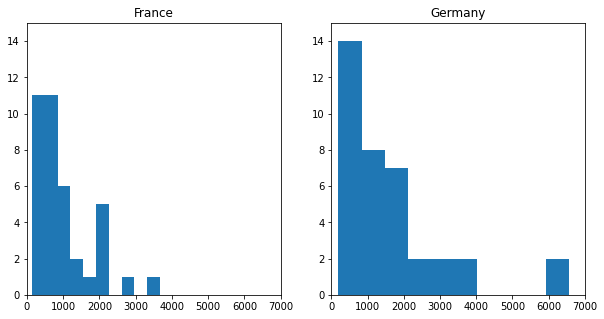

In [ ]:
# Histogram for Number of Chars (in the summary)

Numbers_Chars_Summary_fr = france_df["Numbers_Chars_Summary"]
Numbers_Chars_Summary_ger = german_df["Numbers_Chars_Summary"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(Numbers_Chars_Summary_fr)
ax1.set_title("France")
ax1.set_xlim([0,7000])
ax1.set_ylim([0,15])

ax2.hist(Numbers_Chars_Summary_ger)
ax2.set_title("Germany")
ax2.set_xlim([0,7000])
ax2.set_ylim([0,15])

# Show plot
plt.show()

Less number of chars in the France Data than in German Data.

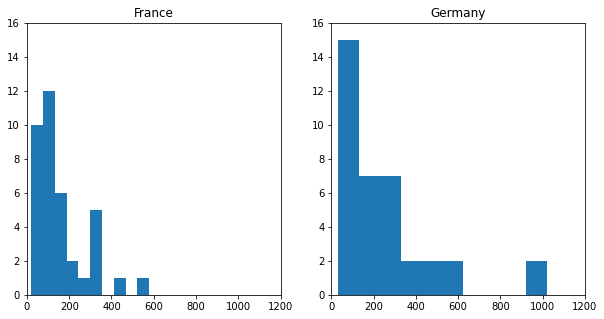

In [ ]:
# Histogram for Number of Tokens (in the summary)

Number_Tokens_fr = france_df["Number_Tokens"]
Number_Tokens_ger = german_df["Number_Tokens"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(Number_Tokens_fr)
ax1.set_title("France")
ax1.set_xlim([0,1200])
ax1.set_ylim([0,16])

ax2.hist(Number_Tokens_ger)
ax2.set_title("Germany")
ax2.set_xlim([0,1200])
ax2.set_ylim([0,16])

# Show plot
plt.show()

Less number of tokens in the France Data than in German Data.



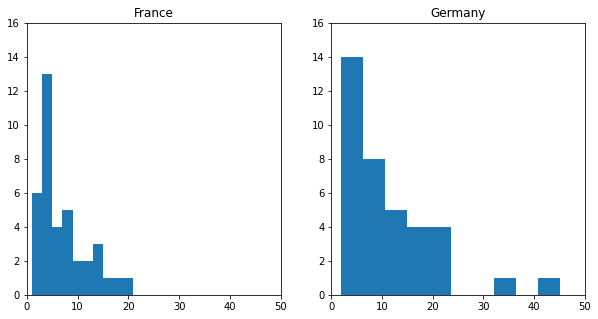

In [ ]:
# Histogram for Number of Sentences (in the summary)

Number_Sentences_fr = france_df["Number_Sentences"]
Number_Sentences_ger = german_df["Number_Sentences"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(Number_Sentences_fr)
ax1.set_title("France")
ax1.set_xlim([0,50])
ax1.set_ylim([0,16])

ax2.hist(Number_Sentences_ger)
ax2.set_title("Germany")
ax2.set_xlim([0,50])
ax2.set_ylim([0,16])

# Show plot
plt.show()

Less number of senteces in the France Data than in German Data.

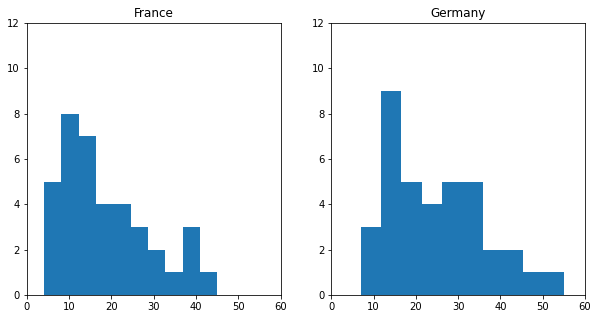

In [ ]:
# Histogram for Number of Stop Words (in the summary)

Number_Sentences_fr = france_df["Number_Stop_Words"]
Number_Sentences_ger = german_df["Number_Stop_Words"]

# Creating histogram
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax1.hist(Number_Sentences_fr)
ax1.set_title("France")
ax1.set_xlim([0,60])
ax1.set_ylim([0,12])

ax2.hist(Number_Sentences_ger)
ax2.set_title("Germany")
ax2.set_xlim([0,60])
ax2.set_ylim([0,12])

# Show plot
plt.show()

Not a big difference between the usage of stopwords for french or german related wikipedia articles.

### Scatter Plots

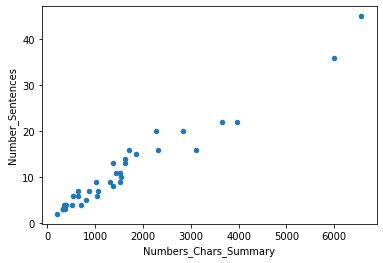

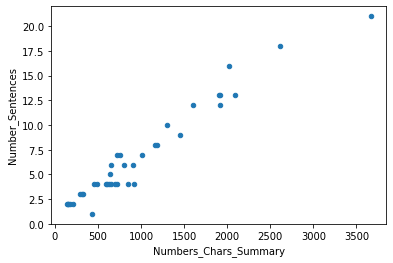

In [ ]:
# Scatterplot Chars to Sentences 
german_df.plot.scatter("Numbers_Chars_Summary", "Number_Sentences")
france_df.plot.scatter("Numbers_Chars_Summary", "Number_Sentences")

A clear positive correlation can be observed: The more characters there are in the text, the more sentences there are.

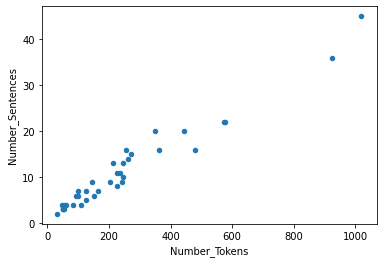

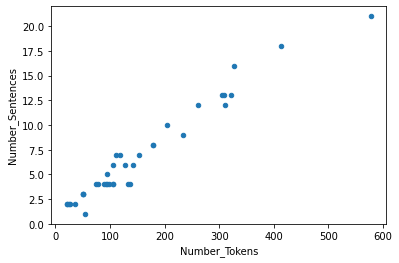

In [ ]:
# Scatterplot Tokens to Sentences
german_df.plot.scatter("Number_Tokens", "Number_Sentences")
france_df.plot.scatter("Number_Tokens", "Number_Sentences")

A clear positive correlation can be observed: The more tokens there are in the text, the more sentences there are.

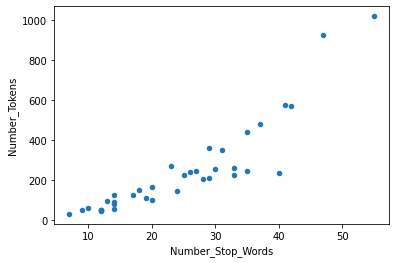

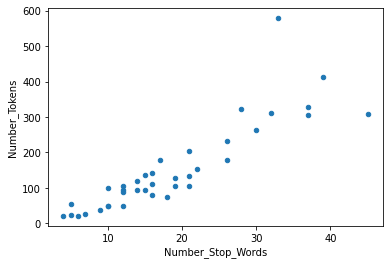

In [ ]:
# Scatterplot Tokens to Stopwords
german_df.plot.scatter("Number_Stop_Words" ,"Number_Tokens")
france_df.plot.scatter("Number_Stop_Words", "Number_Tokens")

Again an expected  positive correlation can be observed: The more stop words there are in the text, the more tokens there are.

## Exploratory Text Analysis (ETA)

### Word Clouds

In [ ]:
# Preparation
all_summary_france = france_df["Summary"]
all_summary_germany = german_df["Summary"]

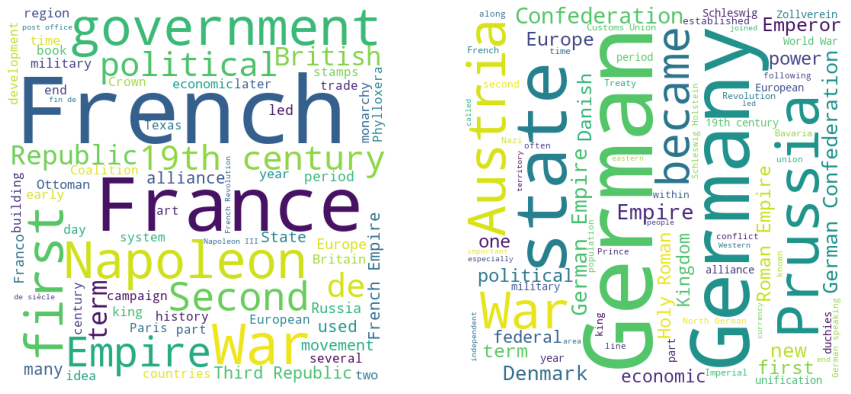

In [ ]:
# Generate Workcloud with the Summary Text
wordcloud_france = WordCloud(width = 500, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(all_summary_france.str.cat())


wordcloud_germany = WordCloud(width = 500, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(all_summary_germany.str.cat())


# Definition of the subplots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

#France
ax1.imshow(wordcloud_france) 
ax1.axis("off") 

#Germany
ax2.imshow(wordcloud_germany) 
ax2.axis("off") 

plt.show()

**French Word Cloud**\
For the French text 'France' and 'French' are important words. In addition, the words 'Napoleon', 'War', 'Empire', 'Republic', 'political', 'first/second', 'Government' and 'British/Britain' are also displayed with a large font size, which with WordCloud function indicates that these words are particularly common and play a role. 

Analyzed on a content level, these words are quite applicable to France in the 19th century. Napoleon not only played a strong role in the french revolution and coalition wars. His successors, Napoleon II and Napoleon III as Emperor of the French, also played a major role in this century. The theme of 'War' were of fundamental importance for France, both in terms of the Napoleonic Wars, during the Revolution or in colonization. The words 'Empire', 'Republic', 'political', 'government' and 'first/second' refer to the strong political movements that prevailed in France when the republic and empire were proclaimed in alternating order.

**German Word Cloud**\
For the German text 'German' and 'Germany' are important words. In addition, the words 'Austria', 'Prussia', 'War', 'state' and became are also displayed with a large font size, which indicates that these words occur frequently.

Analyzed on a content level, these words are also applicable to Germany in the 19th century. German history in the 19th was characterized by dualism between Prussia and Austria, which is also reflected in the Word Cloud. The word "state" represents the many small states in the German Confederation. The word "War", on the other hand, is also crucial to German history, as Bismarck's wars of unification ultimately led to the creation of the German Empire.


**Remove obvious words** \
The words French, Franco, France and German, Germany shall not be included in the Word Cloud because it is obvious that they appear since we deal with exact that data. I think it is more interesting to see word clouds without these 5 words. This will be done now:

In [ ]:
# First make copies of the data DataFrames, since we want to keep the original values
france_df_cleaned = france_df.copy()
german_df_cleaned = german_df.copy()

# Removing French and France
france_df_cleaned["Summary"] = france_df_cleaned["Summary"].str.replace("French", "", regex=False, case = True)
france_df_cleaned["Summary"] = france_df_cleaned["Summary"].str.replace("France", "", regex=False, case = True)
france_df_cleaned["Summary"] = france_df_cleaned["Summary"].str.replace("Franco", "", regex=False, case = True)

# Removing German and Germany
german_df_cleaned["Summary"] = german_df_cleaned["Summary"].str.replace("Germany", "", regex=False, case = True)
german_df_cleaned["Summary"] = german_df_cleaned["Summary"].str.replace("German", "", regex=False, case = True)

# Preparation
all_summary_france_cleaned = france_df_cleaned["Summary"]
all_summary_germany_cleaned = german_df_cleaned["Summary"]

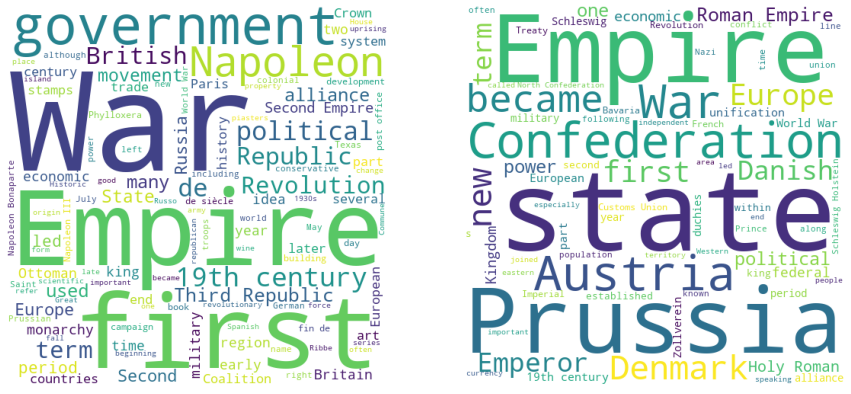

In [ ]:
# Generate Workcloud with the Summary Text
wordcloud_france = WordCloud(width = 500, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(all_summary_france_cleaned.str.cat())


wordcloud_germany = WordCloud(width = 500, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(all_summary_germany_cleaned.str.cat())


# Definition of the subplots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

#France
ax1.imshow(wordcloud_france) 
ax1.axis("off") 

#Germany
ax2.imshow(wordcloud_germany) 
ax2.axis("off") 

plt.show()

**French Word Cloud**\
After removing the obvious words the before mentioned important words: "Napoleon, War, Empire, Republic, political, first/second, Government and British/Britain" become larger.

**German Word Cloud**\
After removing the obvious words the before mentioned important words: "Austria, Prussia, War, state"  become larger. In addition, the words Europe, Empire, new, Denmark, and Confederation will also be shown as large and will therefore be considered significant.

These fits also to the german history, since Denmark which played an important role for the First Unification War (Danish-Prussian War in 1864). The german confederation was the shape of germany before the creation of the empire. 

### N-Gramming


#### Unigrams

In [ ]:
# Unigrams with stopwords, based on the cleaned data
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

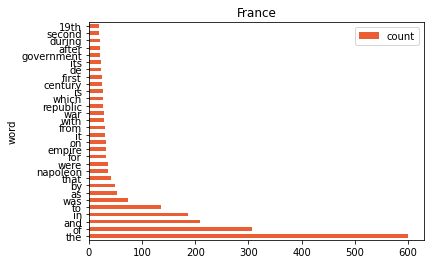

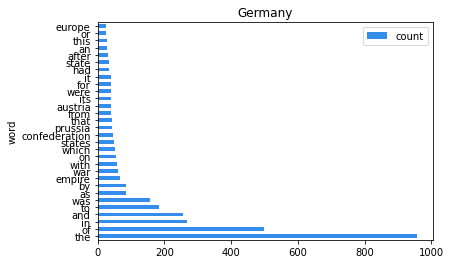

In [ ]:
n = 30

top_n_fr = pd.DataFrame(get_top_n_words(france_df_cleaned['Summary'], n), columns = ['word' , 'count'])
fr_bar_chart = top_n_fr.plot.barh(x="word", y="count", color= "#eb5e34", title="France")

top_n_ger = pd.DataFrame(get_top_n_words(german_df_cleaned['Summary'], n), columns = ['word' , 'count'])
ger_bar_chart = top_n_ger.plot.barh(x="word", y="count", color= "#348ceb", title="Germany") #prussian blue

The unigrams show similar words as the word cloud, except that the stop words are still in there. The stop words are not really meaningful and interesting for the interpretation. Therefore it will be removed.

In [ ]:
# Unigrams after stopword removal
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

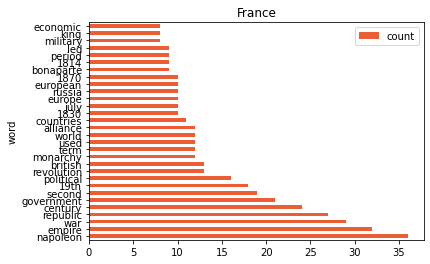

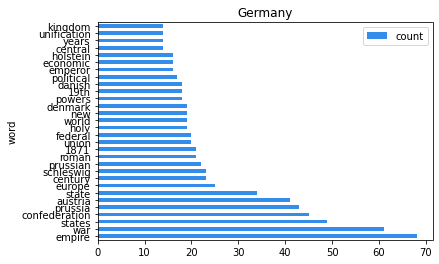

In [ ]:
n = 30

top_n_fr = pd.DataFrame(get_top_n_words(france_df_cleaned['Summary'], n), columns = ['word' , 'count'])
fr_bar_chart = top_n_fr.plot.barh(x="word", y="count", color= "#eb5e34", title="France")

top_n_ger = pd.DataFrame(get_top_n_words(german_df_cleaned['Summary'], n), columns = ['word' , 'count'])
ger_bar_chart = top_n_ger.plot.barh(x="word", y="count", color= "#348ceb", title="Germany")

**French unigrams** \
Unlike in the word cloud, unigrams does not cleanse years, which is why the years 1814, 1830, 1870 now appear, representing important dates in french history.

**German unigrams** \
Unlike in the word cloud, unigrams does not cleanse years, which is why the years 1871 representing an important dates in german history.

#### Bigrams

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

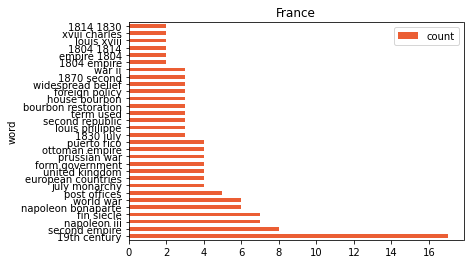

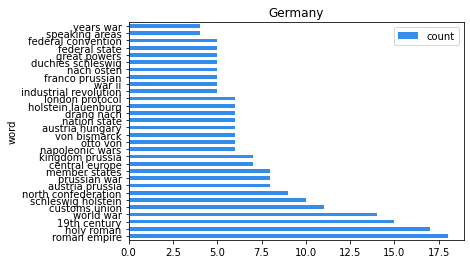

In [ ]:
n = 30

top_n_fr = pd.DataFrame(get_top_n_bigram(france_df_cleaned['Summary'], n), columns = ['word' , 'count'])
fr_bar_chart = top_n_fr.plot.barh(x="word", y="count", color= "#eb5e34", title="France")

top_n_ger = pd.DataFrame(get_top_n_bigram(german_df_cleaned['Summary'], n), columns = ['word' , 'count'])
ger_bar_chart = top_n_ger.plot.barh(x="word", y="count", color= "#348ceb", title="Germany") 

With a bigram it is possible to get more interesting data in terms of a historical evaluation. 

**French bigrams** \
Interesting words here are, for example, JulyMonarch / 1830 July. This term is an established historical expression and stands for the reign of Citizen King Louis Philippe I.

The mention of the Ottoman Empire or Puerto Rico are very surprising mentions. Why both bigrams appear is not clear to me, as I cannot relate anything to them in the 19th century. All I know is that the Ottoman Empire and France had historically good relations for other centuries with each other, but as far as I know these had already subsided by the 18th century. 

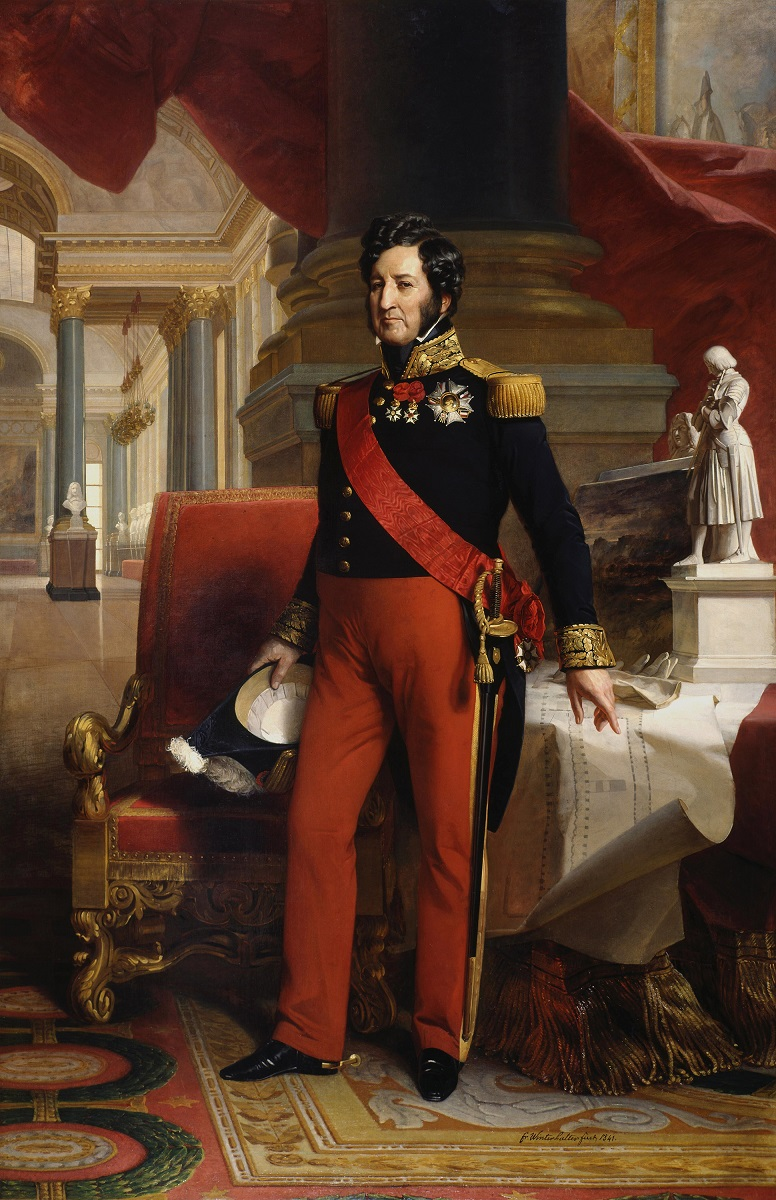

Picture showing: The King Louis Philippe I. [Source](https://en.wikipedia.org/wiki/File:1841_portrait_painting_of_Louis_Philippe_I_(King_of_the_French)_by_Winterhalter.jpg)

**German bigrams** \
Interesting words here are Schleswig Holstein, north confederation, prussian war, napoleonic wears and industrial revoultion. 

The mention of Schleswig Holstein is important in that it was the primary cause of war for the first unification war against Denmark in 1864. 

The North Confederation is also an established historical term referring to a successor to the German Confederation and a predecessor of the German Empire. 

In addition, the so-called Napoleonic Wars and the Prussian Wars, and most recently the Industrial Revolution, were also important factors in the 19th century.

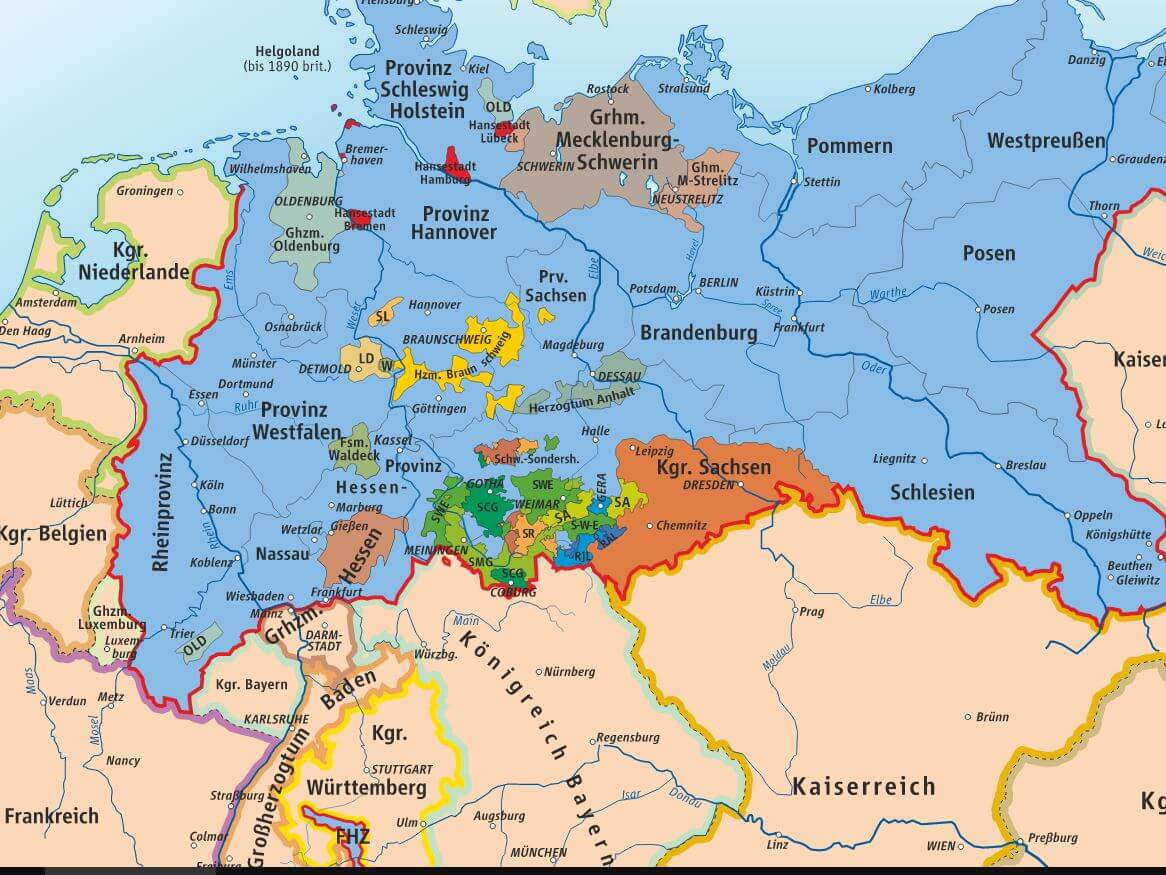

Picture showing: A map of the north confederation. [Source](https://www.geschichte-abitur.de/wp-content/uploads/2016/05/norddeutscher-bund2.jpg)

#### Trigrams

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

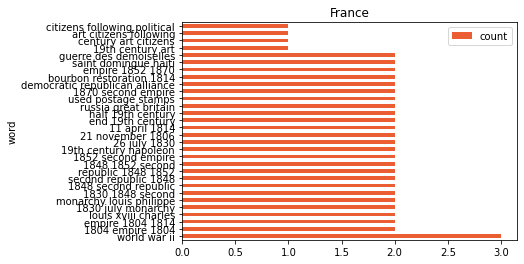

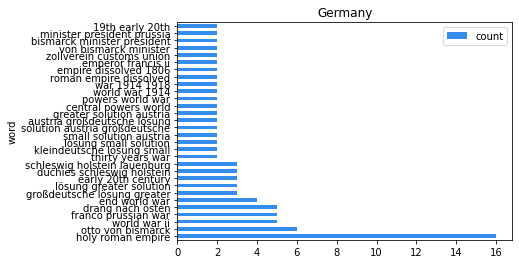

In [ ]:
n = 30

top_n_fr = pd.DataFrame(get_top_n_trigram(france_df_cleaned['Summary'], n), columns = ['word' , 'count'])
fr_bar_chart = top_n_fr.plot.barh(x="word", y="count", color= "#eb5e34", title="France")

top_n_ger = pd.DataFrame(get_top_n_trigram(german_df_cleaned['Summary'], n), columns = ['word' , 'count'])
ger_bar_chart = top_n_ger.plot.barh(x="word", y="count", color= "#348ceb", title="Germany") 

With a trigram it is possible to get even more interesting data as with bigrams.

**French Trigrams** \
Interesting trigrams here would be for example the "Bourbon Restoration 1814", which led to the rule of Louis XVIII. The Allies reinstated him as the official Bourbon ruler at the Congress of Vienna in 1814. 

Another interesting mentioned historical term is "empire 1852 1870" or "1870 second empire" which stands for the rule of Napoleon III's rule in the second French empire of 1852-1870.



**German Trigrams** \
With regard to German history, it would be worth mentioning the terms "großdeutsche lösung greater" or "kleindeutsche lösung small", which stood for the dualism between Austria and Prussia. "Großdeutsch"  would have meant that Austria belonged to the German Empire, "Kleindeutsch" meant excluding Austria.

Another interesting trigram is the holy roman empire, which was dissolved 1806 which is also a trigram.

### Token Frequency with Keywords

Given a list of dates, personalities and countries the goal is to see how often the mentioned keywords are in the text. This can be done with Token Frequency. 

Token Frequency(t) = number of tokens (N) where t occurs\
Note: This is different to Document Frequency, where the number of documents /different texts is taken instead. I wanted to develop another approach.

In [ ]:
def token_frequency(df, keyword, text):
  counter=0
  for row in df["Tokens"]:
    for token in row:
      if token == keyword:
        counter +=1
  print(f"There is a total of {counter} number of mentions for the keyword {keyword} in the {text} text.")
  return counter

In [ ]:
#all keywords have to be lowercase!
list_dates = ["1806", "1813","1814","1815","1830", "1848", "1864", "1866", "1870", "1871", "1890"]
list_personalities = ["napoleon", "louis", "bismarck", "wilhelm"]
list_countries = ["austria", "bavaria", "denmark", "england", "france", "great britain", "prussia", "russia", "sweden"]

In [ ]:
for keyword in list_personalities:
  token_frequency(german_df, keyword, "german")
  token_frequency(france_df, keyword, "french")
  print(30* "*")

There is a total of 5 number of mentions for the keyword napoleon in the german text.
There is a total of 36 number of mentions for the keyword napoleon in the french text.
******************************
There is a total of 0 number of mentions for the keyword louis in the german text.
There is a total of 7 number of mentions for the keyword louis in the french text.
******************************
There is a total of 10 number of mentions for the keyword bismarck in the german text.
There is a total of 0 number of mentions for the keyword bismarck in the french text.
******************************
There is a total of 5 number of mentions for the keyword wilhelm in the german text.
There is a total of 0 number of mentions for the keyword wilhelm in the french text.
******************************


Back to the initial question it can be seen now that Napoleon is not only mentioned in french but also in german history articles. We can therefore conclude that Napoleon plays a role in both wikipedia article categories.

This is not the case for Louís, Bismarck or Wilhelm other important personalities for either french or germany, which are not considered in the opposite direction.

In [ ]:
for keyword in list_dates:
  token_frequency(german_df, keyword, "german")
  token_frequency(france_df, keyword, "french")
  print(30* "*")


There is a total of 4 number of mentions for the keyword 1806 in the german text.
There is a total of 4 number of mentions for the keyword 1806 in the french text.
******************************
There is a total of 1 number of mentions for the keyword 1813 in the german text.
There is a total of 0 number of mentions for the keyword 1813 in the french text.
******************************
There is a total of 0 number of mentions for the keyword 1814 in the german text.
There is a total of 4 number of mentions for the keyword 1814 in the french text.
******************************
There is a total of 8 number of mentions for the keyword 1815 in the german text.
There is a total of 2 number of mentions for the keyword 1815 in the french text.
******************************
There is a total of 0 number of mentions for the keyword 1830 in the german text.
There is a total of 3 number of mentions for the keyword 1830 in the french text.
******************************
There is a total of 6 num

All given Dates which are expected as the most important dates are mentioned in the german or french history articles. The common dates of french and german history of 1848 and 1870/1871 are mentioned in the article.

However only in the german article 1813 is mentioned and only in the french article the year 1814 is mentioned.

In [ ]:
for keyword in list_countries:
  token_frequency(german_df, keyword, "german")
  token_frequency(france_df, keyword, "french")
  print(30* "*")

There is a total of 41 number of mentions for the keyword austria in the german text.
There is a total of 4 number of mentions for the keyword austria in the french text.
******************************
There is a total of 11 number of mentions for the keyword bavaria in the german text.
There is a total of 0 number of mentions for the keyword bavaria in the french text.
******************************
There is a total of 19 number of mentions for the keyword denmark in the german text.
There is a total of 2 number of mentions for the keyword denmark in the french text.
******************************
There is a total of 1 number of mentions for the keyword england in the german text.
There is a total of 1 number of mentions for the keyword england in the french text.
******************************
There is a total of 5 number of mentions for the keyword france in the german text.
There is a total of 56 number of mentions for the keyword france in the french text.
************************

All countries which are expected to be mentioned in the french or german articles appears in their texts except for great britain -->this most likely for the reason that the country is not called great britain, but rather britain, United Kingdom or UK.

### Type Token Ratio (TTR) and other metrics

In [ ]:
text_fr = france_df["Summary"].astype(str)
text_ger = german_df["Summary"].astype(str)

Unique Words and Total Number of Words

In [ ]:
# get unique tokens
unique_words_fr = list(
    set([word for doc in [doc.split() for doc in text_fr] for word in doc]))

unique_words_ger = list(
    set([word for doc in [doc.split() for doc in text_ger] for word in doc]))

In [ ]:
#France
# number of unique tokens
total_number_unique_words_fr = len(unique_words_fr) 
#print(german_df.columns)
total_number_tokens_fr = france_df["Number_Tokens"].sum()

print("total_number_unique_tokens", total_number_unique_words_fr)
print("total_number_tokens", total_number_tokens_fr)

total_number_unique_words 2223
total_number_tokens 5824


In [ ]:
#Germany
# number of unique tokens
total_number_unique_words_ger = len(unique_words_ger) 
#print(german_df.columns)
total_number_tokens_ger = german_df["Number_Tokens"].sum()

print("total_number_unique_tokens", total_number_unique_words_ger)
print("total_number_tokens", total_number_tokens_ger)

total_number_unique_words 2885
total_number_tokens 8953


Interpretation: The total number of tokens and total number of unique tokens is higher for german articles.

#### Type Token Ratio (TTR)

TTR is the total number of UNIQUE words (types) divided by the total number of words (tokens) in the text. 

TTR = 𝑡𝑦𝑝𝑒 / 𝑡𝑜𝑘𝑒𝑛

In [ ]:
TTR1 = (total_number_unique_words_fr / total_number_tokens_fr) * 100
print("The TTR for the french history related articles is", TTR1)

TTR2 = (total_number_unique_words_ger / total_number_tokens_ger) * 100
print("The TTR for the german history related articles is", TTR2)

The TTR for the french history related articles is 38.169642857142854
The TTR for the german history related articles is 32.22383558583715


Interpretation: The french history article has a higher value for the TTR with 38%. This number represents the variety in vocabulary, which seems to be low in general for both.

#### Sentences / Text

In [ ]:
# Calculate Sentences / Text
total_number_sentences_fr = france_df["Number_Sentences"].sum()
total_number_texts_fr = france_df["Title"].count()

total_number_sentences_ger = german_df["Number_Sentences"].sum()
total_number_texts_ger = german_df["Title"].count()

Sentences_Text_fr = total_number_sentences_fr/total_number_texts_fr
Sentences_Text_germ = total_number_sentences_ger / total_number_texts_ger

print("The Sentences/Text Metrics for the french history related articles is", Sentences_Text_fr)
print("The Sentences/Text Metrics for the german history related articles is", Sentences_Text_germ)

The Sentences/Text Metrics for the french history related articles is 6.7631578947368425
The Sentences/Text Metrics for the german history related articles is 11.162162162162161


Interpretation: The french history related articles have less sentences per text as the german articles. 

#### Words / Sentences

In [ ]:
total_number_tokens_fr = france_df["Number_Tokens"].sum()
total_number_sentences_fr = france_df["Number_Sentences"].sum()

total_number_tokens_ger = german_df["Number_Tokens"].sum()
total_number_sentences_ger = german_df["Number_Sentences"].sum()

Word_Sentences_fr = total_number_tokens_fr / total_number_sentences_fr
Word_Sentences_ger = total_number_tokens_ger / total_number_sentences_ger

print("The Word/Sentences Metrics for the french history related articles is", Word_Sentences_fr)
print("The Word/Sentences Metrics for the german history related articles is", Word_Sentences_ger)

The Word/Sentences Metrics for the french history related articles is 22.66147859922179
The Word/Sentences Metrics for the german history related articles is 21.677966101694917


Interpretation: The french history related articles have more words per sentences as the german articles. 

## Summary

With the usage of Word Clouds, N-Gramming and the Token Frequency it is possible to analyze historical summary texts of the french and german related category Wikipedia articles of the 19th century. Many terms that appear frequently fit my historical understanding of the century in terms of:

- Important historical terms: e.g. "Kleindeutsche Lösung" and "Großdeutsche Lösung"
- Important Dates: e.g. 1813, 1830, 1848, 1871
- Important People: e.g. Napoleon, Louis, Bismarck, Wilhelm
- And important countries: e.g. Denmark and Prussia

In general, I would therefore say that text analysis can provide a fairly accurate historical picture of time.

The only big surprise for me was the mention of Puerto Rico and Ottoman Empire in the bigrams of the french texts, to which i have no answer. However, it would be interesting to read these articles further to understand why they should be relevant to 19th century French history.



## Lessons learned & Reflection

With this text analysis, I was able to delve deeper into linguistic concepts, text processing and Word Clouds, as well as N-Gramming.

I have to admit that I'm surprised that you can do simple text analyzes with just a few data sets (37 texts per category) and only one variable (the text) that actually enable data to be interpreted. 

However, it would certainly make sense to increase the text size by using the entire text content of the 37 articles per category so that the text analysis is even more meaningful.

Up until now we have been used to working with numerical, ordinal or categorical variables. Working with plain text was the challenge of even figuring out what can be interesting to analyze. It was like a creative challenge at first. Without numeric/ordinal/categorical variables, modeling or creating some plots like line chars / pie charts or even box plots doesn't really make sense.

However, I have learned that the data alone can provide meaningful results based on different metrics like the number of tokens, or by querying certain keywords or even by using Word Clouds and N Gramming. 

